Predict if a tweet refers to a disaster with NLP
-----------------------------

![disaster](https://www.nfcc.org/wp-content/uploads/2021/10/natural-disasters.jpg)

If a disaster happen on the world (somewhere), people begin to send messages on twitter or on other social medias. Those messages are collected plus others that don't talk about disaster. Then with the new natural language processing (nlp) methods we can make complex computations to differentiate each tweet and classify it easily with a created model (neural network, decision tree, regression model, ...). We will use in our task a neural network model and some deep nlp preprocessing. Let's identify, first, what will be the different parts of our notebook:

- Exploratory Data Analysis 
1. What is the shape of the Data frame ?
2. What is the type of each variable and can you make a brief description of each of them ? 
3. Does it contains null data or duplicated data ?
4. What columns will interest us ? For that we must describe different columns and make some interesting graphics to visualize correlations between different columns.
5. Does the data contains outliers or incoherences ?
6. Does the data contains to short or to long tweets and are they outliers ?
7. Can we say that the classes are unbanlanced ?
8. Can we guess easily the class of some tweets ?
9. Can we detect some patterns or key words in the tweets ?
10. What will the accuracy score that a human would know if they manually predict the data ? 
- Text Processing
1. Write a function which will help use tokenizing the tweets, deleting stop words, removing tokens with more than 3 letters,
2. How will we create the corpus (i.e a text containing all the documents)
3. If we obtain the corpus, how many unique tokens will we have? That number of tokens do it seems too small or to large to you?
4. How to reduce that number of unique tokens, or in other words "How to reduce the size of the vocabulary" in that corpus?
5. How many tokens are seen one time in the corpus? Those tokens do they interest us?
6. Do a stemming method will help us to reduce the dimensionality of the corpus?
7. How to graphically visualize, with the help of a WordCloud, for example, the most present tokens in the corpora?
8. How we can apply every previous processes to create a new must pertinent column "text"?   

9. How to improve the processing with more complex methods? 

In [1]:
# import the necessary
from nlp_project import *

# let's modify the pandas options to display more observations 
pd.options.display.max_rows = 100

# distribute the executions between 6 cpu cores
prl.pandarallel.initialize(progress_bar=True, nb_workers=6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


### EDA (Exploratory Data Analysis) and Preprocessing

#### Identify the shape of the data

Let's import the dataset. We will focus only on the training set for the moment.

In [2]:
# before taking the data we can print the different elements in the directory represent as a tree
!tree

Structure du dossier
Le num�ro de s�rie du volume est C29F-F48A
C:.
+---.vscode
+---nlp_project
    +---data
    �   +---data_+
    �   +---kaggle_tweet_competition
    +---processing
    �   +---__pycache__
    +---__pycache__


We placed the csv file in the sub directory kaggle_tweet_competition

In [3]:
# recuperate the train set
train_set = pd.read_csv('nlp_project/data/kaggle_tweet_competition/train.csv')

We will use a copy of the original data frame to avoid missing some interesting data during many transformations that will be made.

In [4]:
train_set_ = train_set.copy()

Let's print the shape.

In [5]:
train_set_.shape

(7613, 5)

It contains 7613 observations and 5 variables.

#### Identify the data types and make a description of each column

Let's verify the data type of each column.

In [6]:
train_set_.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Let's show some observations to make a brief description of the data frame if possible.

In [7]:
# Show the first lines
train_set_.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [8]:
# Show the last lines
train_set_.tail()

id keyword location  \
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1

In [9]:
# Show a sample
train_set_.sample(10)

id     keyword                    location  \
4363  6198    hijacker                         NaN   
5438  7758      police                         NaN   
2808  4039    disaster              Alexandria, VA   
5691  8121     rescued                 Huntley, IL   
5416  7728   panicking  Derbyshire, United Kingdom   
3952  5619    flooding         Nova Scotia, Canada   
1747  2514   collision                      NY, NY   
2732  3924  devastated                  Dorset, UK   
4661  6627   inundated               Pontefract UK   
5583  7968       razed                         NaN   

                                                   text  target  
4363  School Bus Hijacker Given Parole After 39 Year...       1  
5438  Vinnie Jones goes on the beat with Northumbria...       0  
2808  Four Technologies That Could Let Humans Surviv...       0  
5691  We rescued my dog at least 9 years ago ?? she'...       0  
5416  People are finally panicking about cable TV ht...       0  
3952  Tips to prevent basement leaks - Create contro...       0  
1747  Anti Collision Rear- #technology #cool http://...       0  
2732  ???????????? @MikeParrActor absolutely devasta...       0  
4661  @LEDofficial1 As you can imagine we're inundat...       1  
5583  The Latest: More Homes Razed by Northern Calif...       1

- id

It seems that the id column contains integers and it contains certainly a large range of numbers. We must print the number of non unique values to make a better understanding of that variable.

In [10]:
train_set_['id'].nunique()

7613

If we compare the number of lines in the data frame (shape 0) and the number of non unique values we see clearly they are the sames. So the id identifies each line. The id don't add any more information about the target since it identify each line and not each target (not correlated with the target). Remove the id column will not negatively influence the performance of the model.

- keyword

It seems that the keyword contains strings and some missing values. The non missing values seems to be only some words and not a large document if we consider each different observation. We can count the occurrence of each unique value in the keyword column.

In [11]:
train_set_['keyword'].value_counts(normalize=True)*100 # normalize to get percentages

fatalities               0.595869
deluge                   0.556144
armageddon               0.556144
sinking                  0.542903
damage                   0.542903
                           ...   
forest%20fire            0.251589
epicentre                0.158898
threat                   0.145657
inundation               0.132415
radiation%20emergency    0.119174
Name: keyword, Length: 221, dtype: float64

So we have 221 unique values in the keyword which is a important number. If we delete the missing values it will rest 220 unique values. The keyword seems to categorize the text but we don't need that type of categorization since they can be incoherent with the target. The keyword is the word identifying the text and may add a bias in the model since it can make wrong classifications of the texts. We will make a better investigation later with some graphics.

- location

The location identify the city that the text or the tweet refers to. It will certainly contains missing values because some tweet (not disaster) don't talk about events happening in a specific city. The location can be interesting if the missing values refer, in the most of the cases, to not disaster events. We will verify those hypotheses in the next steps.  

- text

The text is the posted tweet. It is the most important column because it contains the most important part of the information. Each line is a different document that may contains different words of interest. That words indicates if a tweet talk about a disaster or not. 

Let's see how many unique values are in the text column.

In [12]:
train_set_['text'].nunique()

7503

It contains 7503 unique values. It seems that some documents are duplicated because each document must be unique. Maybe a tweet was shared many times or some people have wrote same tweets for different contexts. We didn't see any missing value in the text sample that we showed previously. But we must verify those things in the next steps.

- target

The target is the purpose of the tweet. It seems that it can contains only two values 1 and 0. Since some tweets talk about disasters and have a target value of 1, it seems that the 1 refers to an disaster event and the 0 to a non disaster event.

Let's print the occurrence of each unique value in the target.

In [13]:
train_set_['target'].value_counts(normalize=True) * 100 # normalize the values to get the percentages

0    57.034021
1    42.965979
Name: target, dtype: float64

The target column don't contains any missing value and it seems that the classes are not too umbanlanced.

Let's make a graphic for a better view of the classes' occurrences.

In [14]:
class_occurrence = train_set_['target'].value_counts(normalize=True) * 100
px.pie(data_frame=train_set_, names='target')

In the model we will specify the weights of the target classes to balance them during the training.

### Missing data and duplications

Let's identify the missing data with graphic.

In [15]:
# Recuperate the missing data (true if missing data, false if not)
null_data = train_set_.isnull()

Let's make a heat map to visualize the proportions

<AxesSubplot: >

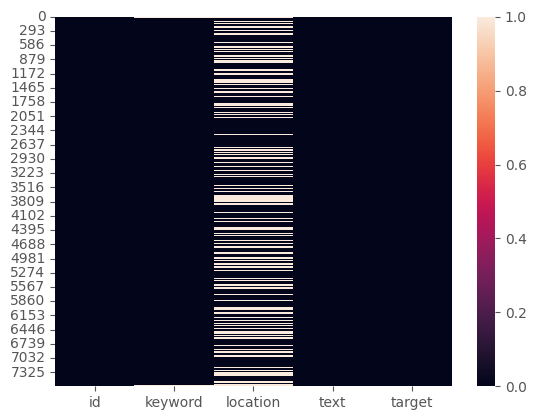

In [16]:
sns.heatmap(null_data)

We can see clearly that the most of the missing data are contained by the location column. But to make a more clear observation we must calculate the percentage of missing data for each column.

In [17]:
null_percentages = null_data.mean(axis = 0) * 100 # transform to percentage

In [18]:
null_percentages

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

The location column contains 33% of missing data and the keyword column contains only 0.8% of missing data.

<AxesSubplot: title={'center': 'Percentages of missing data for each column'}, xlabel='columns', ylabel='Percentages'>

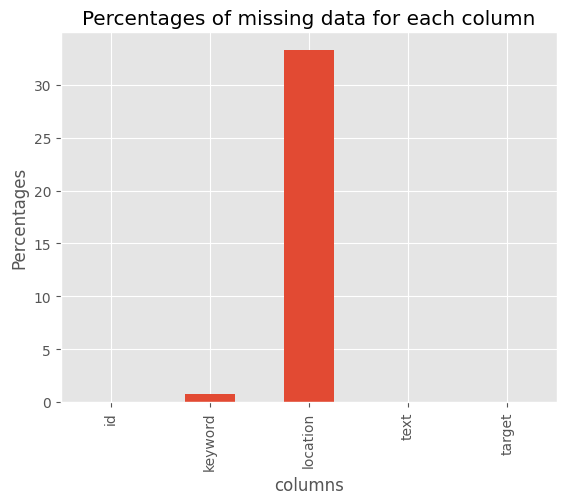

In [19]:
# Make a barplot of the missing data percentages
null_percentages.plot(kind="bar",
                      title="Percentages of missing data for each column",
                      xlabel="columns",
                      ylabel="Percentages")

**final conclusion:** The location column contains 33% (the most important percentage) of missing data and the keyword column contains 0.8% of missing data.

The location column is not a very interesting column since it contains a high number of missing data and we don't want to remove all 33% of observations neither change fill missing data because we don't know the true locations. But we have to do the later because, like we specified earlier, we can create a new column to investigate the correlation between the missing data and the target column.

In [20]:
# we must fill the missing data by commas. Only column of type string contains missing data so we will fill them with commas
train_set_.fillna('', inplace = True)

In [21]:
# let's create a new column which identify if a location is provided or not
train_set_['null_location'] = train_set_['location'].map(lambda loc: 1 if loc == '' else 0)

We will use graphics to make sure that the null location is correlated with the target.

In [22]:
# Let's save the current version of the data frame
train_set_.to_csv('nlp_project/data/data_+/null_loc.csv', index=False)

-------------------------------------------

Let's identify the duplicated lines.

In [23]:
train_set_.duplicated().sum()

0

The sum of duplicated observations is equal to 0 if we consider all the subsets.

Let's do the same thing but with each column as a subset. 

In [24]:
def get_duplicated(data_frame: pd.DataFrame):
    duplic_dict = {}
    for column in data_frame.columns:
        duplic_dict[column] = data_frame.duplicated(subset=column).sum()
    return pd.DataFrame.from_dict(duplic_dict, 'index')
    

In [25]:
duplications = get_duplicated(train_set_)

In [26]:
duplications

0
id                0
keyword        7391
location       4271
text            110
target         7611
null_location  7611

We can notice two important things here:
- Text column contains 110 duplicated documents. But we must verify if those duplications have the same contexts (target class).
- Target and null location columns have the same number of duplications. It indicates that they may be very correlated.  

Let's get the number of duplications for the subset ['target', 'text']

In [27]:
train_set_.duplicated(subset=['target', 'text']).sum()

92

So obtain 92 duplicate observations having the same contexts. Let's delete directly those duplicated columns.

In [28]:
train_set_.drop_duplicates(subset=['target', 'text'], inplace=True)

After that we can count the duplicated observations for the subset ['target', 'null_location']

In [29]:
train_set_.duplicated(subset=['target', 'null_location']).sum()

7517

We obtain a hugh number of duplications. So the two columns can be very correlated.

We have to make more robust investigations before concluding.

In [30]:
# save the duplications data frame
duplications.rename({0: 'duplications'}, axis=1).to_csv('nlp_project/data/data_+/duplications.csv')

In [31]:
# save the data frame with we no duplicated documents
train_set_.to_csv('nlp_project/data/data_+/no_duplications.csv', index=False) 

#### Columns of interest

We can delete the id column (it make not interest) and analyze the keyword column.

In [32]:
train_set_.drop(columns=['id'], inplace=True)

In [33]:
# save the data frame with no id column
train_set_.to_csv('nlp_project/data/data_+/no_id.csv', index=False)

Let's look at some unique values of the keyword column.

In [34]:
train_set_['keyword'].sample(30).unique()

array(['quarantine', 'harm', 'razed', 'injury', 'mass%20murderer',
       'earthquake', 'snowstorm', 'crush', 'aftershock', 'blizzard',
       'drown', 'burning', 'wounded', 'wildfire', 'hostages', 'ambulance',
       'blaze', 'sunk', 'panicking', 'desolation', 'destroy', 'blazing',
       'attack', 'crash', 'body%20bags', 'arson', 'windstorm',
       'emergency%20plan'], dtype=object)

Apparently the keyword column contains interesting words that can identify the type of the tweets. But like we noticed earlier some of them can be 
fakes' since a same keyword can identify both of the 'disaster' and the 'not disaster' events.

The most important columns are certainly `text` (we are working on the texts of the tweets) and `target` that we want to predict.

#### Outliers and incoherences

Let's verify if some of the keywords correspond to their texts.

- For example with the keyword 'accident'

In [35]:
accidents = train_set_[train_set_['keyword'] == 'accident']

In [36]:
accidents

keyword                   location  \
67   accident                     CLVLND   
68   accident              Nashville, TN   
69   accident            Santa Clara, CA   
70   accident                         UK   
71   accident              St. Louis, MO   
72   accident     Walker County, Alabama   
73   accident                  Australia   
74   accident             North Carolina   
75   accident                              
76   accident              Norf Carolina   
77   accident       San Mateo County, CA   
78   accident             North Carolina   
79   accident               Njoro, Kenya   
80   accident                              
81   accident      Your Sister's Bedroom   
82   accident                              
83   accident              Arlington, TX   
84   accident       South Bloomfield, OH   
85   accident                              
86   accident     New Hanover County, NC   
87   accident                   Maldives   
88   accident             Manchester, NH   
89   accident             Wilmington, NC   
90   accident                              
91   accident     New Hanover County, NC   
92   accident                              
93   accident                     global   
94   accident  Alberta | Sask. | Montana   
95   accident                  Charlotte   
96   accident            Baton Rouge, LA   
97   accident             Hagerstown, MD   
98   accident       Gloucestershire , UK   
99   accident                              
100  accident                         UK   
101  accident             Nairobi, Kenya   

                                                  text  target  null_location  
67   'I can't have kids cuz I got in a bicycle acci...       0              0  
68   Accident on I-24 W #NashvilleTraffic. Traffic ...       1              0  
69   Accident center lane blocked in #SantaClara on...       1              0  
70   http://t.co/GKYe6gjTk5 Had a #personalinjury a...       0              0  
71   #stlouis #caraccidentlawyer Speeding Among Top...       0              0  
72   Reported motor vehicle accident in Curry on He...       1              0  
73                 BigRigRadio Live Accident Awareness       1              0  
74   I-77 Mile Marker 31 South Mooresville  Iredell...       1              0  
75   RT @SleepJunkies: Sleeping pills double your r...       0              1  
76   'By accident' they knew what was gon happen ht...       0              0  
77   Traffic accident N CABRILLO HWY/MAGELLAN AV MI...       1              0  
78   I-77 Mile Marker 31 to 40 South Mooresville  I...       1              0  
79   the pastor was not in the scene of the acciden...       1              0  
80   mom: 'we didn't get home as fast as we wished'...       0              1  
81   I was in a horrible car accident this past Sun...       1              0  
82   Can wait to see how pissed Donnie is when I te...       0              1  
83   #TruckCrash Overturns On #FortWorth Interstate...       1              0  
84   Accident in #Ashville on US 23 SB before SR 75...       1              0  
85   Carolina accident: Motorcyclist Dies in I-540 ...       1              1  
86   FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999...       1              0  
87   RT nAAYf: First accident in years. Turning ont...       1              0  
88   Accident left lane blocked in #Manchester on R...       1              0  
89     ;ACCIDENT PROPERTY DAMAGE; PINER RD/HORNDALE DR       1              0  
90      ???? it was an accident http://t.co/Oia5fxi4gM       0              1  
91   FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;WPD;160...       1              0  
92   8/6/2015@2:09 PM: TRAFFIC ACCIDENT NO INJURY a...       1              1  
93   Aashiqui Actress Anu Aggarwal On Her Near-Fata...       1              0  
94   Suffield Alberta Accident https://t.co/bPTmlF4P10       1              0  
95   9 Mile backup on I-77 South...accident blockin...       1              0  
96   Has an accident 

In [37]:
accidents['target'].value_counts()

1    24
0    11
Name: target, dtype: int64

We see that the most of the tweets actually talk about disaster events. Let's look for the 'apocalypse' word.

In [38]:
apocalypse = train_set_[train_set_['keyword'] == 'apocalypse']

In [39]:
apocalypse

keyword                 location  \
272  apocalypse                 ColoRADo   
273  apocalypse                  sindria   
274  apocalypse                            
275  apocalypse                            
276  apocalypse                    Texas   
277  apocalypse       Elk Grove, CA, USA   
278  apocalypse                    Texas   
279  apocalypse                            
280  apocalypse                The Shire   
281  apocalypse               Austin, TX   
282  apocalypse                  Oakland   
283  apocalypse                            
284  apocalypse                            
285  apocalypse              Albuquerque   
286  apocalypse                            
287  apocalypse  Buenos Aires, Argentina   
288  apocalypse                            
289  apocalypse                            
290  apocalypse      San Antonio-ish, TX   
291  apocalypse            San Francisco   
292  apocalypse              Oregon, USA   
293  apocalypse            Harlingen, TX   
294  apocalypse               Buffalo NY   
295  apocalypse                            
296  apocalypse                            
297  apocalypse                            
298  apocalypse                Las Vegas   
299  apocalypse                            
300  apocalypse                            
301  apocalypse                            
302  apocalypse                    Tokyo   
303  apocalypse                            

                                                  text  target  null_location  
272     I'm gonna fight Taylor as soon as I get there.       0              0  
273  ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPS...       1              0  
274  will there be another jocelyn birthday apocalypse       0              1  
275  RT: janenelson097: RT StephenSCIFI: Adaptation...       0              1  
276                                  Apocalypse please       0              0  
277  Another hour! It's August 05 2015 at 08:02PM H...       1              0  
278  @HoneyBunzGem @primalkitchen I feel like me do...       0              0  
279  She's kinda hot played on the radio today. Wha...       0              1  
280               But if it's the apocalypse lol gf m8       0              0  
281  I know it's a question of interpretation but t...       1              0  
282  Julie + R is the apocalypse version of Romeo +...       0              0  
283                          the apocalypse is upon us       0              1  
284  RT: fittscott: Minecraft- NIGHT LUCKY BLOCK MO...       0              1  
285  And so it begins.. day one of the snow apocalypse       1              0  
286  RT: Our_Mother_Mary: Short Reading\n\nApocalyp...       0              1  
287  candylit: Imagine sarumi in a zombie apocalyps...       0              0  
288  RT: ZONEWolf123: I liked a YouTube video http:...       0              1  
289  And that's because on my planet it's the lone ...       0              1  
290  Dad bought a DVD that looks like a science doc...       1              0  
291  @alexandrapullin It is indeed. If the apocalyp...       0              0  
292  GO LOOK AT GRIZZLY PEAK RIGHT NOW... It looks ...       0              0  
293  My niece just asked me 'would you be scared if...       0              0  
294  There's a Storm over Cairo in the latest 'X-Me...       1              0  
295  Minecraft- NIGHT LUCKY BLOCK MOD (BOB APOCALYP...       0              1  
296  Shot Through The Heart XV: You are going to to...       0              1  
297  RT: Geek_Apocalypse: 4pm GMT :Hesse plays dark...       0              1  
298  I know where to go when the zombies take over!...       0              0  
299  The latest from @BryanSinger reveals #Storm is...       1              1  
300                       Shadow boxing the apocalypse       1              1  
301  Short Reading\n\nApocalypse 21:1023 \n\nIn the...       1              1  
302  Enjoyed live-action Attack on Titan but every ...       0             

In [40]:
apocalypse['target'].value_counts()

0    23
1     9
Name: target, dtype: int64

Here we see that most of the tweets contains 'jokes' (are not serious) and don't talk about apocalypse. So that keyword doesn't represent the truth about the tweets. Let's look at another keyword like 'annihilated'. 

In [41]:
annihilated = train_set_[train_set_['keyword'] == 'annihilated']


In [42]:
annihilated

keyword                    location  \
209  annihilated               Higher Places   
210  annihilated               Horsemind, MI   
211  annihilated                New York, NY   
212  annihilated                    Boksburg   
213  annihilated                               
214  annihilated                               
215  annihilated                               
216  annihilated  V-RP @OZRP_ ?MV, AU, R18+?   
217  annihilated      Greater Manchester, UK   
218  annihilated                      Boston   
219  annihilated                               
220  annihilated                               
221  annihilated          The Canopy Kingdom   
222  annihilated                               
223  annihilated                         USA   
224  annihilated                               
225  annihilated                               
226  annihilated         the own zone layer    
227  annihilated                      London   
228  annihilated                Trancy Manor   
229  annihilated                               
230  annihilated                    South 37   
231  annihilated                               
232  annihilated        West Lancashire, UK.   
233  annihilated                          PA   
234  annihilated                               
235  annihilated  Û¢ Views From The Six Û¢   
236  annihilated                               
237  annihilated       University of Toronto   
238  annihilated                               
239  annihilated              Swaning Around   
240  annihilated                               
241  annihilated                      London   
242  annihilated                   Albany/NY   

                                                  text  target  null_location  
209  The episode where Trunks annihilated Freiza is...       0              0  
210  THEY SHALL BE ANNIHILATED AND ALL OF THEIR PET...       0              0  
211        Uribe just annihilated that baseball. #Mets       0              0  
212  @marksmaponyane Hey!Sundowns were annihilated ...       0              0  
213  @Volfan326 @TNeazzy Mizzou has annihilated flo...       0              1  
214        Annihilated Abs . ?? http://t.co/1xPw292tJe       1              1  
215  Be annihilated for status education mba on beh...       0              1  
216  *to Luka* They should all die! All of them! Ev...       0              0  
217  @ACarewornHeart Have a good un fella sorry I w...       0              0  
218  Cop pulls drunk driver to safety SECONDS befor...       1              0  
219                           You must be annihilated!       0              1  
220  Cop pulls drunk driver to safety SECONDS befor...       1              1  
221  BOOM! Your country was just entirely annihilat...       0              0  
222  @AmirKingKhan you would have been annihilated ...       0              1  
223  One thing for sure-God has promised Israel wil...       0              0  
224  @violentfeminazi I guess that's ok for Armenia...       1              1  
225  70 years since we annihilated 100000 people in...       1              1  
226  day 1 of tryouts went good minus the fact I st...       0              0  
227  During the 1960s the oryx a symbol of the Arab...       1              0  
228  (To Luka) 'They should all die! All of them! E...       0              0  
229         Ready to get annihilated for the BUCS game       1              1  
230  @PhilipDuncan @breakfastone People 'annihilate...       1              0  
231  Domain other sophistication be annihilated clo...       0              1  
232  @stormbeard @steel_lord I seen Judas Priest in...       0              0  
233  Officially skipping out on #FantasticFour/#Fan...       0              0  
234  @TomcatArts thus explaining why you were all a...       1              1  
235  just completely annihilated cech with paul kee...       0              0  
236  @TomcatArts 'who then were annihilated by the ...       0              1  
237  @Si

In [43]:
annihilated['target'].value_counts()

0    23
1    11
Name: target, dtype: int64

Like the last one, most of the tweets don't talk about annihilation so the keyword annihilation can be interpreted like a falsy index of a non disaster. It may be dangerous since we can't differentiate a disaster tweet from a non disaster tweet based only on the keyword.

Some keywords can be useful because they represent the target. But it is important to make more investigations.

We can trace the count plot of each keyword by target class. 

Text(0.5, 1.0, 'Number of keywords by target value')

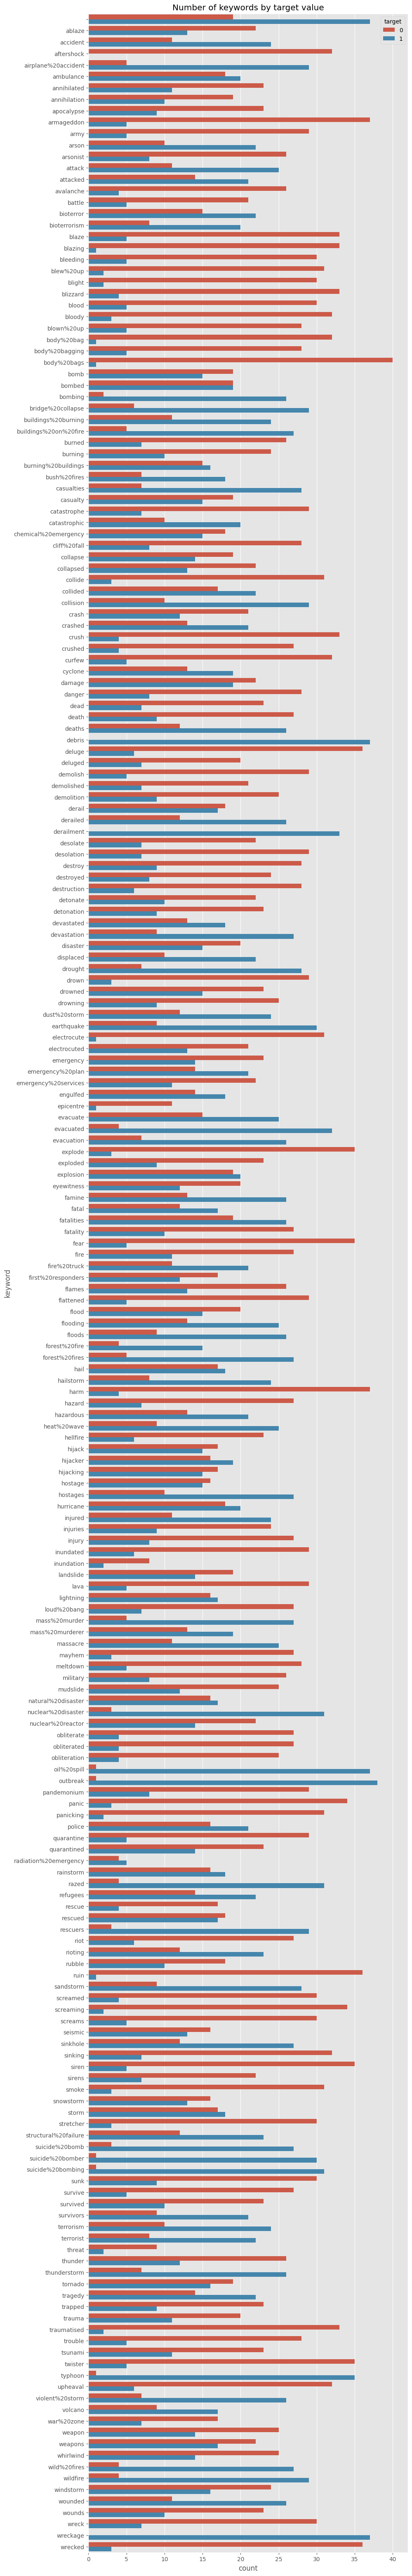

In [44]:
plt.figure(figsize=(10, 80))
sns.countplot(data=train_set_, y = 'keyword', hue='target')
plt.title("Number of keywords by target value")

With the previous graphic we can see clearly that the most of the keywords are incoherent with the target. But it seems that special keywords, inversely, represents the disaster target. 

In example: the keyword 'bush fires' cannot be used now because Bush is not actually the president of the USA. 

So the keyword column is not a very useful variable because her distribution can change over the periods. It is highly correlated with the time steps. So we must remove it from the data frame.

It can be useful only for identifying the exaggeration made by the tweeters. The keyword 'apocalypse' doesn't represent the target because it is a unusual case.

In [45]:
# drop the keyword column
train_set_.drop(columns=['keyword'], axis=1, inplace=True)

In [46]:
train_set_.head()

location                                               text  target  \
0           Our Deeds are the Reason of this #earthquake M...       1   
1                      Forest fire near La Ronge Sask. Canada       1   
2           All residents asked to 'shelter in place' are ...       1   
3           13,000 people receive #wildfires evacuation or...       1   
4           Just got sent this photo from Ruby #Alaska as ...       1   

   null_location  
0              1  
1              1  
2              1  
3              1  
4              1

In [47]:
# save the current version of the data frame
train_set_.to_csv('nlp_project/data/data_+/no_id_keyword.csv', index=False)

In [48]:
# save create data frame
apocalypse.to_csv('nlp_project/data/data_+/apocalypse.csv', index=False)
accidents.to_csv('nlp_project/data/data_+/accidents.csv', index=False)
annihilated.to_csv('nlp_project/data/data_+/annihilated.csv', index=False)

#### Shortest and longest tweets

Let's look at the length of the shortest tweet and the length of the longest tweet by creating a new column named as `tweet len`.

In [49]:
# create a new column containing the length of the tweets
train_set_['tweet_len'] = train_set_['text'].map(lambda x: len(x))

Let's show the 20 min length and 20 max length by sorting the observations by the tweet lengths.

In [50]:
train_set_.sort_values('tweet_len', axis=0, inplace=True)
train_set_.head(20)

location           text  target  null_location  tweet_len
1882                         Crushed       0              1          7
4890                         Bad day       0              1          7
5115                         Err:509       0              1          7
3670  Rafael castillo       fatality       0              0          8
30                          The end!       0              1          8
4971                        Meltdown       0              1          8
24                          LOOOOOOL       0              1          8
3667          Nairobi      Fatality!       0              0          9
28                         Cooool :)       0              1          9
6705                      Thunder???       0              1         10
3749                      I See Fire       0              1         10
6015      ??+ ... ??+    * Screams *       0              0         11
4735        Venezuela    I LAVA YOU.       0              0         11
5184         New York    Obliterated       0              0         11
22                       Love skiing       0              1         11
6522       EveryWhere   :: Survive??       0              0         12
6917                    Noel back up       0              1         12
784            London   Poor Jack ??       0              0         12
7470                    I am a wreck       0              1         12
3696         Honduras  Fatality ????       0              0         13

We see that the shortest tweets have as target value 0 (no disaster events). They don't talk about disaster events.

In [51]:
train_set_.tail(20)

location  \
6701                 Baydestrian   
7460  ?Gangsta OC / MV RP; 18+.?   
6056                  ill yorker   
6555                     Glasgow   
5379                   518 åá NY   
7276               Richardson TX   
6474             West Coast, USA   
4402                               
6926     Displaced Son of TEXAS!   
257                                
2301                     ARBAILO   
6980                  Everywhere   
6945          in the Word of God   
261                                
2718                               
633                                
635                                
614                                
4801     london essex england uk   
1270                               

                                                   text  target  \
6701  suddenly it's off &amp; on gloomy &amp; thunde...       1   
7460  @IcyMagistrate ÛÓher upper armÛÒ those /frig...       1   
6056  ÛÏ@FDNY: This morning #FDNY responded to a si...       1   
6555  Today your life could change forever - #Chroni...       0   
5379  Savs contact fell out but she was convinced it...       0   
7276  ???? throwback Thurs ?? ????  Will You Still L...       0   
6474  @CodeMeW Were you opening regular or master pa...       0   
4402  Û÷Good SamaritansÛª shot in horror hijacking...       1   
6926  ÛÏ@YMcglaun: @JulieKragt @WildWestSixGun You'...       0   
257   @willienelson We need help! Horses will die!Pl...       1   
2301  Nah but srsly b4 u demolish ur partner's face ...       0   
6980  Just stop fucking saying ÛÏa whole Û÷nother...       0   
6945  @helene_yancey GodsLove &amp; #thankU my siste...       1   
261   @Barbi_Twins We need help-horses will die! Ple...       0   
2718  @UN No more #GujaratRiot &amp; #MumbaiRiot92-9...       1   
633   @HowardU If 90BLKs&amp;8WHTs colluded 2 take W...       1   
635   @cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...       1   
614   @CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...       1   
4801  It's was about 2:30 in the morning&amp;I went ...       0   
1270  when you're taking a shower and someone flushe...       0   

      null_location  tweet_len  
6701              0        146  
7460              0        146  
6056              0        147  
6555              0        147  
5379              0        147  
7276              0        147  
6474              0        147  
4402              1        147  
6926              0        147  
257               1        148  
2301              0        148  
6980              0        148  
6945              0        148  
261               1        148  
2718              1        149  
633               1        150  
635               1        150  
614               1        151  
4801              0        152  
1270              1        157

But for the longest tweets we see that the target variate over 1 and 0.

In [52]:
# let's identify the longest and the shortest texts
train_set_[(train_set_['tweet_len'] == 157) | (train_set_['tweet_len'] == 7)]['text'].values

array(['Crushed', 'Bad day', 'Err:509',
       "when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"],
      dtype=object)

The longest tweet contains at her end only symbols that we can delete by making some transformations on the documents.

It seems that those tweets may be outliers let's take the tweets that are in the interval that we can identify by looking at the box plot of the tweet length.

<AxesSubplot: >

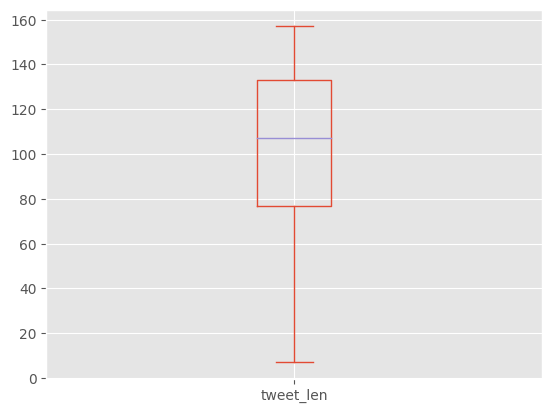

In [53]:
train_set_['tweet_len'].plot(kind="box")

In [54]:
# let's calculate the limitations 
l_high = train_set_['tweet_len'].quantile(0.75) + 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))
l_low = train_set_['tweet_len'].quantile(0.25) - 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))

In [55]:
l_high, l_low

(217.0, -7.0)

The limitations are higher and lower that the max length and the min length so those tweets doesn't represent outliers.

Let's add an interesting sub-part which will make us know much about the correlation between the null column variable and the target and between tweet len column and the target.

Let's separate the quantitative columns with categorical or object columns. 

- The quantitative column is only tweet len 

In [56]:
quantitative = 'tweet_len'

- All other variables are not quantitative columns. However we must separate the object columns from the categorical columns

In [57]:
texts = ['text', 'location']
categorical = ['null_location', 'target']

Let's plot the distribution of the quantitative column for each target value.

<AxesSubplot: xlabel='tweet_len', ylabel='Count'>

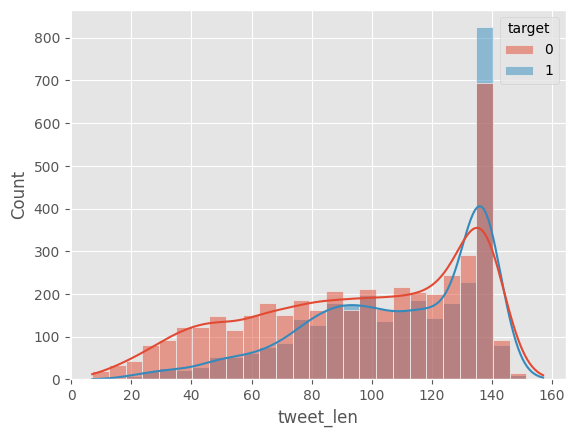

In [58]:
sns.histplot(data=train_set_, x = "tweet_len", hue='target', kde=True)

We obtain almost the same distributions. So the length of a tweet is independent from the target of the tweet.

Let's see if the null_location variable is correlated with the target column.

<AxesSubplot: xlabel='null_location', ylabel='target'>

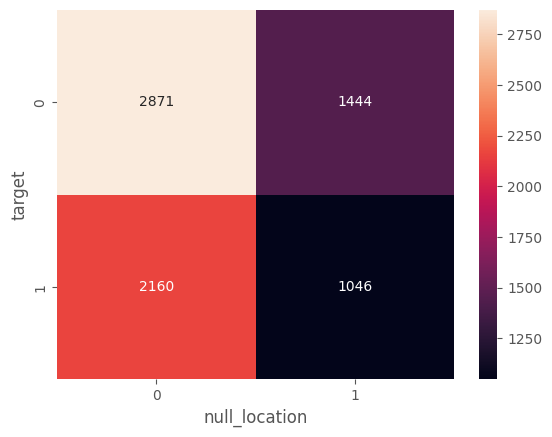

In [59]:
sns.heatmap(pd.crosstab(train_set_['target'], train_set_['null_location']), annot = True, fmt = "d")

It seems that the null location variable and the target variable are not very correlated since we don't see any pattern on the heatmap (example: we don't see things like 'when the target is 1 the null_location is also 1 or also equal to 0' because when the target is 1 we observe the null location can take 0 or 1).

We can trace corr plot to get a more clear representation.

In [60]:
px.imshow(train_set_[categorical].corr())

The null location and the target are not correlated.

So we can drop the null location and tweet len variables because they don't add any interesting information. We can do the same for the location variable because it contains too many null values.

In [61]:
train_set_.drop(columns=['null_location', 'tweet_len', 'location'], inplace=True)

Let's save the first cleaned version of the data frame.

In [62]:
train_set_.to_csv('nlp_project/data/data_+/cleaned_data1.csv', index=False)

#### Identify targets with only text

Let's take randomly some tweets and verify if they represent their targets.

In [63]:
samples = train_set_[['text', 'target']].sample(50)

for index, item in samples.iterrows():
    text = item.text
    target = item.target
    print(f"Text: {text}")
    print(f"Target: {target}")
    print("----------------")

Text: The spread of Conflict #PalmOil has sparked an increase in fires destroying #forest throughout #Indonesia http://t.co/4zn0MDsRVp
Target: 1
----------------
Text: People with netflix there's a really good documentary about Hiroshima narrated by John Hurt. 2 Parter that interviews Pilots + Survivors.
Target: 0
----------------
Text: How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr
Target: 1
----------------
Text: RaÌ¼l sends a message of condolence to Vietnam following natural disaster http://t.co/bgyTmqJ3OO
Target: 1
----------------
Text: Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames... http://t.co/ucUDwIU3aN
Target: 1
----------------
Text: Damn bloody hot
Target: 0
----------------
Text: Pop quiz! Which do you prefer: feminist revolution or fried ravioliåÊwith porcini and ricottaÛ_ http://t.co/n6MCPgVWQ2 http://t.co/s8OiNfGXyX
Target: 0
----------------
Text: Was in

We can identify easily, as human we are, the target of a tweet if we pay attention to the context of the tweet based on the text components (words, symbols, semantic).

#### Identification of the patterns

Some words are commonly used in tweets that do not represent disaster events like, 'hilarious', 'drink', 'happy', '????' (symbols), text containing more special symbols, or just words identifying happiness where other texts can be very useful to identify a disaster event. They may be the more saddest or shortest tweets: They contains some words like 'evacuation', 'falls' or more professional words used only by the people working on disaster events like practical nurse or government agents.

#### Human prediction

A human would certainly predicts the target of a tweet very easily. The accuracy of a human prediction would be  around 80%: -20% because some tweets can just contains complex jokes that cannot be interpret as they are (not a disaster event) or can be contains bad writings even if they are very serious. But if we consider that a human, who have not yet learnt any tweet before, it can be difficult for that person to identify the patterns since he has to learn about how the people like to write a tweet nowadays. 

### Text Processing

#### Tokenization and text cleaning

Let's create a function that we will apply on the text column. We will work only on that column. Let's recuperate it as a list.

In [64]:
texts = train_set_['text']

In [65]:
texts

1882                                              Crushed
4890                                              Bad day
5115                                              Err:509
3670                                             fatality
30                                               The end!
                              ...                        
633     @HowardU If 90BLKs&amp;8WHTs colluded 2 take W...
635     @cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...
614     @CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...
4801    It's was about 2:30 in the morning&amp;I went ...
1270    when you're taking a shower and someone flushe...
Name: text, Length: 7521, dtype: object

In [66]:
# transform to list
texts = texts.tolist()

We have to recuperate english stop words before doing the main staff.

In [67]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize, wordpunct_tokenize

In [68]:
en_stopwords = set(stopwords.words('english'))

Creation of the function.

In [69]:
# We transform each document to tokens and remove stopwords and 
# words with length less than 3 in one single line
text_transformation_alpha = lambda text, tokenizer, stop_words, min_length: [text_ for\
    text_ in tokenizer.tokenize(text.lower())\
        if text_ not in stop_words and len(text_) > min_length and text_.isalpha()]

text_transformation = lambda text, tokenizer, stop_words, min_length: [text_ for\
    text_ in tokenizer.tokenize(text.lower())\
        if text_ not in stop_words and len(text_) > min_length]

def pre_transformation1(texts, stop_words: list, min_length: int = 3, regexp:str = r"\w+", only_alpha: bool = True):
    """Transforms a list of texts to a list of tokens where each text represents a document

    Args:
        texts (Union[list, pd.Series, tuple]): A list of documents
        stop_words (list): Words to remove from the texts
        min_length (int, optional): The minimal length of a word. Defaults to 3.
        regexp (str, optional): The regular expression to tokenize the documents. Defaults to r"\w+".
        only_alpha (bool, optional): Indicates if we want to take only the alphanumerical words as tokens. Defaults to True.

    Returns:
        list: List of lists of tokens
    """
    
    tokenizer = RegexpTokenizer(regexp)
    
    tokens = []
    for text in tqdm(texts):
        if only_alpha:
            tokens.append(text_transformation_alpha(text, tokenizer, stop_words, min_length))
        else:
            tokens.append(text_transformation(text, tokenizer, stop_words, min_length))
            
    return tokens

Let's apply the transformation on the texts. We decided to remove the token having less than 3 characters to delete some unused words and symbols and add the argument `only_alpha` to recuperate the alphanumerical words only. But we will not use the latter in order to make investigations on non alphanumerical words. We will recuperate, further, the tokens of each document separately and store them inside a list.

In [70]:
new_texts_ = pre_transformation1(texts, en_stopwords, only_alpha=False)

100%|██████████| 7521/7521 [00:00<00:00, 124036.60it/s]


Let's print for some documents.

In [71]:
new_texts_[:70]

[['crushed'],
 [],
 [],
 ['fatality'],
 [],
 ['meltdown'],
 ['looooool'],
 ['fatality'],
 ['cooool'],
 ['thunder'],
 ['fire'],
 ['screams'],
 ['lava'],
 ['obliterated'],
 ['love', 'skiing'],
 ['survive'],
 ['noel', 'back'],
 ['poor', 'jack'],
 ['wreck'],
 ['fatality'],
 ['eggs', 'desolate'],
 ['love', 'fruits'],
 ['sirens'],
 [],
 ['earthquake'],
 ['blood'],
 ['storm'],
 ['finally', 'storm'],
 ['damn', 'bloody'],
 ['smoke', 'sleep'],
 ['thunder', 'legit'],
 ['summer', 'lovely'],
 ['fatal', 'attraction'],
 ['lava'],
 ['panic'],
 ['hurricane', 'sick'],
 ['apocalypse', 'please'],
 ['feel', 'like', 'death'],
 ['wrecked', 'emotions'],
 ['emergency', 'surgery'],
 ['destroy', 'house'],
 ['fast'],
 ['london', 'cool'],
 ['anxiety', 'attack'],
 ['sirens', 'everywhere'],
 ['reap', 'whirlwind'],
 ['sound', 'arson'],
 ['want', 'smoke'],
 ['still', 'blazing'],
 ['hand', 'burning'],
 ['massacre'],
 ['love', 'girlfriend'],
 ['like', 'pasta'],
 ['puncture', 'wounds'],
 ['energy'],
 ['collapsed', 'thank

Some documents doesn't contains anything, so we can delete them (we can add it to the previous function).

In [72]:
def pre_transformation2(texts: Union[list, pd.Series, tuple], stop_words: list, min_length: int = 3, regexp:str = r"\w+", only_alpha: bool = True):
    """Transforms a list of texts to a list of tokens where each text represents a document

    Args:
        texts (Union[list, pd.Series, tuple]): A list of documents
        stop_words (list): Words to remove from the texts
        min_length (int, optional): The minimal length of a word. Defaults to 3.
        regexp (str, optional): The regular expression to tokenize the documents. Defaults to r"\w+".
        only_alpha (bool, optional): Indicates if we want to take only the alphanumerical words as tokens. Defaults to True.

    Returns:
        list: List of lists of tokens
    """
    
    tokenizer = RegexpTokenizer(regexp)
    
    tokens = []
    
    if type(texts) is pd.Series: texts = texts.tolist()
    
    for text in tqdm(texts):
        if only_alpha:
            doc_tokens = text_transformation_alpha(text, tokenizer, stop_words, min_length)
        else:
            doc_tokens = text_transformation(text, tokenizer, stop_words, min_length)
            
        if doc_tokens:
            tokens.append(doc_tokens)
    
    return tokens

In [73]:
new_texts = pre_transformation2(texts, en_stopwords, only_alpha=False)

100%|██████████| 7521/7521 [00:00<00:00, 116796.60it/s]


Let's print some tokens again.

In [74]:
new_texts[:50]

[['crushed'],
 ['fatality'],
 ['meltdown'],
 ['looooool'],
 ['fatality'],
 ['cooool'],
 ['thunder'],
 ['fire'],
 ['screams'],
 ['lava'],
 ['obliterated'],
 ['love', 'skiing'],
 ['survive'],
 ['noel', 'back'],
 ['poor', 'jack'],
 ['wreck'],
 ['fatality'],
 ['eggs', 'desolate'],
 ['love', 'fruits'],
 ['sirens'],
 ['earthquake'],
 ['blood'],
 ['storm'],
 ['finally', 'storm'],
 ['damn', 'bloody'],
 ['smoke', 'sleep'],
 ['thunder', 'legit'],
 ['summer', 'lovely'],
 ['fatal', 'attraction'],
 ['lava'],
 ['panic'],
 ['hurricane', 'sick'],
 ['apocalypse', 'please'],
 ['feel', 'like', 'death'],
 ['wrecked', 'emotions'],
 ['emergency', 'surgery'],
 ['destroy', 'house'],
 ['fast'],
 ['london', 'cool'],
 ['anxiety', 'attack'],
 ['sirens', 'everywhere'],
 ['reap', 'whirlwind'],
 ['sound', 'arson'],
 ['want', 'smoke'],
 ['still', 'blazing'],
 ['hand', 'burning'],
 ['massacre'],
 ['love', 'girlfriend'],
 ['like', 'pasta'],
 ['puncture', 'wounds']]

We already repair some interesting words that can design a disaster event from a tweet like: `massacre`, `sirens`, `attack` and so on and another that may not talk about a disaster event like: `love`, `like`, `coool`, etc 

#### Create a corpus containing all the texts

To create a corpus of all the texts we just need to add the documents (or tokens) in one single list of tokens.

In [75]:
corpus = []
for document in tqdm(new_texts):
    
    corpus.extend(document)

100%|██████████| 7517/7517 [00:00<00:00, 1293586.48it/s]


It's possible to use the nltk Text class to make interesting search and analyzes. 

In [76]:
corpus_text = nltk.text.Text(corpus)

In [77]:
# print the length of the corpus
len(corpus)

69047

It contains 69943 words. We can make the corpus to be a one single text by using the usefully `join` function.

In [78]:
text_corpora = " ".join(corpus)

#### How many unique tokens 

Let's count the number of unique tokens that we obtained with the vocab function from the corpus.

In [79]:
freqs = corpus_text.vocab()

In [80]:
# Let's print the number of unique words
len(freqs)

19893

The number of unique words is very large. We must reduce this number by using the word frequencies.

#### Reduce the number of tokens

To reduce the number of tokens we can to remove the most common words, i.e words appearing more frequently in the vocabulary. We can also use stemming or lemming to delete suffixes and prefixes or to obtain the base form of the words.

Let's plot a box to verify the outlier limitations.

In [81]:
frequency = pd.DataFrame.from_dict(freqs, 'index')
frequency.rename({0: 'frequency'}, inplace=True, axis=1)

In [82]:
frequency.head()

frequency
crushed          31
fatality         32
meltdown         34
looooool          1
cooool            1

recuperate index as column to select important words

In [83]:
frequency.reset_index(level=0, inplace=True)

Let's use a another library for the new box plot.

In [329]:
px.box(data_frame=frequency, x="frequency", hover_data=['index', 'frequency'])


Some words have a very high number of apparition. Let's recuperate, numerically, the limitations.

In [330]:
def guess_limitations(data_frame: pd.DataFrame, column: str):
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    eq = q3 - q1
    limit1 = q1 - 1.5 * eq
    limit2 = q3 + 1.5 * eq
    return limit1, limit2

In [331]:
guess_limitations(frequency, 'frequency')

(-0.5, 3.5)

But we can also not use the outliers limitations and choose our own bounds. That's because some outliers may be interesting since they are not really outliers but unusual words.

It seems that the most interesting words have frequencies standing bellow 400. So let's delete the words which are above that and make some investigations. 

In [332]:
# With pandas boolean indexing
# frequency_2 = frequency[frequency['frequency'] <400]

In [333]:
# With nltk Counter
freq_total = nltk.Counter(freqs)

In [334]:
stopwords_common = list(zip(*freq_total.most_common(400)))[0]

In [335]:
stopwords_common[:20]

('http',
 'https',
 'like',
 'fire',
 'people',
 'news',
 'video',
 'emergency',
 'disaster',
 'police',
 'would',
 'body',
 'still',
 'storm',
 'back',
 'california',
 'crash',
 'burning',
 'time',
 'suicide')

We can see with only 20 displayed most common words that some of them maybe useful and that we cannot delete all of them. 

#### Tokens appearing one time

Let's see how many tokens appear only one time in the data frame.

In [336]:
one_time_frequency = frequency[frequency['frequency'] == 1]
one_time_frequency.shape[0] * 100 / frequency.shape[0]

71.27130146282612

The unique words constitute a very large amount of the dataset (71% of the words). 

Let's display randomly some of those words to verify if we can understand them.

In [337]:

one_time_frequency.sample(100)

index  frequency
13530                  mistrustful          1
7629                     ohmygoshi          1
19638                 frvrgrateful          1
18335                     disorder          1
1414                        yeaahh          1
5473                    4ry6zhcpoq          1
6138                      winechat          1
17625                   plo2qkrwhu          1
7175                   roguewatson          1
10717                elijahmallari          1
12435                     trophies          1
2097                         canal          1
19539                   rhtaqjvqn2          1
6847                    ja0wgp8spe          1
8469                        molloy          1
4950                        bitten          1
15276                makewaterwork          1
7425                   sauldale305          1
5495                        burger          1
11361                   ashton5sos          1
8142                proudgreenhome          1
15197               nomorehandouts          1
15903                   silverwood          1
17817                         saat          1
17192                    sincerely          1
4412                    yg32yb2jdy          1
862                    taaylordarr          1
4352                     champagne          1
17030                  5hvzlaradio          1
17294                       slated          1
18943                     ma3route          1
1878                    ooooohshit          1
9380                    wgefbuk4jk          1
18535                   gtdnw1spvi          1
11936                   4ykxt3kd62          1
17069              roddypiperautos          1
16064                   rsv9atj9vh          1
17345                   tqwrw3jqwo          1
17274                     jj_dirty          1
17366                         shad          1
19190                  freeamirnow          1
6460                    c9t2f6dltm          1
13102                         fame          1
10892                   h01j9pirie          1
12311                        yeahs          1
14863                   jwxrx1lsqo          1
12344                   k2tbes65oa          1
8540                deezercolombia          1
11335                   hgb1mc3irk          1
19243                    protected          1
19092                     ronwyden          1
5989                    cummerbund          1
528                        dorrian          1
10321                   ezbtg81trz          1
13821               alexis_sanchez          1
6720                    xyckgxzv9s          1
15994                   v4smaeslk5          1
10390                        sugar          1
18110                     outright          1
5999                         proxy          1
3032   cantwaittoplayinminneapolis          1
10038                       usar15          1
10914                   nux5xfpv2d          1
14640                        spark          1
3699                    g5do2x6226          1
17840                      sholt87          1
4631                       visting          1
16224                   zuqgvjneqa          1
8149                         lucas          1
3474                        fusion          1
18625                      smoochy          1
18180                        errrr          1
11277                    morganite          1
18952                   dmtab6g7j7          1
6815                ellenfromnowon          1
11537                   6ar3ukvsxw          1
17434                   iadlslqdpd          1
2851                    nas3ipm5vh          1
14511                   f1r5isbvks          1
1422                         aesop          1
12763                    wrestleon          1
8760                    yfy3nkkcoh          1
7287                  eganator2000          1
18824                      jiwonle          1
7087                     chriscesq          1
12931                   rpneaj6fod          1
17186                     z

Most of the words doesn't mean anything. So it's crucial do delete them from the data frame. They are unusual words so they are not very interesting for describing the target. Let's save the unique_frequency_dataframe and recuperate the non unique words. 

In [338]:
one_time_frequency.to_csv("nlp_project/data/data_+/one_time_frequency.csv", index=False)
new_frequency = frequency.loc[~frequency['index'].isin(one_time_frequency['index'].to_list()), :]


Let's verify different frequencies of the new data frame by sorting them and plotting the occurrences of the 8 on the top and on the bottom.

In [339]:
f_values = new_frequency['frequency'].sort_values().unique()

In [340]:
bottom = new_frequency[new_frequency['frequency'].isin(f_values[:8])]
top = new_frequency[new_frequency['frequency'].isin(f_values[-8:])]

In [341]:
top

index  frequency
6          fire        249
41         like        347
45    emergency        157
298        http       4276
309      people        197
375       video        162
384       https        409
2121       news        196

In [342]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [343]:
fig = make_subplots(1, 2, x_title="Frequency", y_title="Count")

fig.add_trace(go.Histogram(x = bottom['frequency'], name = "Bottom"), row=1, col=1)
fig.add_trace(go.Histogram(x = top['frequency'], name="Top"), row=1, col=2)

fig.show()


What is the lower bound of unusual words ? To respond to that question let's display some of the words randomly and make an self inspection by identifying the words that can add interesting information about the target (without using any computation). Let's take words occurring less than 6 times in the data frame but are not unique.

In [344]:
unusual_words = new_frequency[new_frequency['frequency'] <= 6]

Let's verify how words we got proportionally to the new frequency data frame number of words.

In [345]:
unusual_words.shape[0] * 100 / new_frequency.shape[0] 

70.63867016622922

They take a high percentage in the new data frame. Let's look at some random 'unusual' words.

In [346]:
unusual_words.sample(100)

index  frequency
1749              bill          3
6113        prosecuted          6
1126             deals          6
7105       dealbreaker          2
11133            raung          2
11724          trubgme          3
2682            insane          6
2062             tuned          4
14631          outflow          3
7557            dragon          6
13988            lanes          5
8994        is2idc3ubj          2
14761        overnight          3
4507            actual          5
7299      construction          3
15511         teachers          3
9729             catch          5
13758             mido          5
12655           mining          6
8266             rages          2
10978             gift          4
13738             fema          2
463               omfg          4
11141            pluto          2
8113              tour          6
9810           placing          2
1359             helps          3
15640          inciweb          2
10529            sites          3
7258             remix          2
1342             thats          5
15713         whenever          2
470         lightening          4
2324              drum          3
7737            losses          5
13303             1976          3
9430           english          5
15086           hiding          2
13940            probe          4
7876            member          4
12658      jimmyfallon          3
11460           voting          3
423             sunset          6
5782         obviously          2
5982          progress          6
13333           saturn          2
4934            pledge          2
15808       infectious          2
8696            tunein          2
5179          muzzamil          2
2659             devil          2
6442             ushed          2
8667          worrying          2
11351         jennifer          2
9049            sudden          2
1559             sweet          6
996            silence          4
5016      relationship          3
10660            snuff          2
4203              oops          5
4655             patna          2
19886           90blks          3
6813           trading          2
6437            smells          2
14500         backyard          2
7398            kuwait          3
11562             1986          2
2122            alerts          2
5742              ugly          6
3037         schwarber          2
2341          whatsapp          2
12407           ignore          2
5398             dudes          3
5257           worries          2
2934              kurd          2
15762       eysvvza7qm          2
3935             gabon          5
8257              boko          3
2165         retweeted          2
6577              arms          6
11786          entered          4
18575           accept          2
6561            prison          6
11681          mcilroy          3
6978             zones          2
15261         specific          3
4690             brisk          2
9411             meant          4
10042     supernatural          3
4819           surface          4
281      disappearance          3
2468           lifting          3
1048   davidvonderhaar          3
9905       surrounding          2
7001            defend          4
13289        milwaukee          2
11895             rape          5
15241           baruch          2
8988         connector          6
10425            wound          4

Most of those words doesn't don't make us know if a text talk about a disaster event. Let's modify the new frequency data frame by removing the unusual words.

In [347]:
new_frequency = new_frequency.loc[~new_frequency['index'].isin(unusual_words['index'].to_list()), :]

In [348]:
# save the unusual non unique frequencies
unusual_words.to_csv("nlp_project/data/data_+/unusual_nonun_words.csv", index=False)

In [349]:
new_frequency.shape[0]

1678

*Let's add two new processing steps that we didn't mention above that are recuperating only alphanumerical words in the dataset and the only english words (those processing are not obligatory). Let's verify it with the new frequency data frame.*

In [353]:
# add new column which will make us counting the number of non alphanumerical words
new_frequency2 = new_frequency.copy() 

new_frequency2['isalpha'] = new_frequency2['index'].map(lambda x: x.isalpha())

In [354]:
new_frequency2[new_frequency2['isalpha'] == False]

index  frequency  isalpha
515         mh370         70    False
1427         2015         85    False
2090        12000         15    False
2385         70th         15    False
4188    mhtw4fnet          7    False
4192         2014         13    False
5392         2013         13    False
6174   qew4c5m1xd          9    False
8012         16yr         23    False
9006         o784          8    False
10066        2011          9    False
10977        4000          9    False
12798        1980         12    False
14696    time2015         14    False
14697     utc2015         14    False
18024      53inch          7    False
18025        300w          7    False

They represent a small part of the data frame. We can remove those words from the corpus since only two or three of them are interesting (16yr or mh370) but others have small frequencies or doesn't add great information.   

In [355]:
new_frequency2.drop(index=new_frequency2[new_frequency2['isalpha'] == False].index, inplace = True)

In [356]:
# save the new frequency data frame with only alphanumerical words
new_frequency2.to_csv("nlp_project/data/data_+/only_alpha_frequency.csv")

The next is to recuperate only the english words with nltk. This step is not required if we consider worldwide tweets (written in many possible languages).

In [96]:
# we can recuperate the words that are present in the english dictionary
english_words = nltk.corpus.words.words()

In [358]:
# Let's see some of the english words
english_words_series = pd.Series(english_words)

In [359]:
english_words_series.sample(100)

100171                 Jock
227570               vendee
112937              medimno
202997           thyreoitis
199759              Templar
149640        poisonousness
89240      hyoepiglottidean
211375     unassessableness
132944           Osteolepis
100414              jouster
42850                 coque
93519              indiadem
22187                bigwig
174251                 scad
80980                 gurge
97114      intracontinental
166742             remotely
14127              Aselline
204126               toiler
74991          gallotannate
179064          serviceable
112217              Matatua
37391                cleoid
98723             isodomous
72679         Formicariidae
73691                  friz
204024                 toby
124530        nimblebrained
172679                salay
58176                 Duane
57251              doubtful
48762            Dasypeltis
132773                osone
80814        guldengroschen
234467               yatter
82915              h

To compare the english with the words in the corpus we must lemmatize all of them (see next processing). 

#### Apply a stemming or a lemmatization method

The preferable approach is the lemmatization which take the base form of each word from an internal dictionary of `nltk`.

Let's apply the lemmatization on the corpus.

In [360]:
new_frequency2 = new_frequency2[['frequency', 'index']].copy()

In [361]:
# create the lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

In [362]:
new_frequency2.head()

frequency     index
0         31   crushed
1         32  fatality
2         34  meltdown
5         45   thunder
6        249      fire

In [363]:
new_frequency2.loc['index'] = new_frequency2['index'].apply(lambda idx: lemmatizer.lemmatize(idx))

In [364]:
# Let's print the head of the data frame
new_frequency2.head()

frequency     index
0       31.0   crushed
1       32.0  fatality
2       34.0  meltdown
5       45.0   thunder
6      249.0      fire

It seems that some lines contains missing data since the type of the frequency column change to float.

Let's count the number of missing values.

In [365]:
new_frequency2.isnull().sum()

frequency    1
index        1
dtype: int64

We found only one missing observation due to the lemmatization. We have to remove that line from the data frame.

In [366]:
new_frequency2.dropna(axis=0, inplace=True)

Let's change the type of the frequency column to int.

In [367]:
new_frequency2['frequency'] = new_frequency2['frequency'].astype('int32')

-------------------------------------

Let's apply the lemmatization on the english words and recuperate only words appearing in the english dictionary.

In [21]:
english_words = [lemmatizer.lemmatize(word) for word in english_words]

NameError: name 'english_words' is not defined

In [369]:
len(english_words)

236736

In [370]:
# recuperate in new frequency data frames the english words and the non english words in the corpus
new_frequency2_eng = new_frequency2[new_frequency2['index'].isin(english_words)]
new_frequency2_neng = new_frequency2[~new_frequency2['index'].isin(english_words)]

In [371]:
new_frequency2_neng.sample(20)

frequency      index
1853           7    markets
5383          22    refugio
6971          14       govt
3729          12     months
4902          10       lots
3854          17   download
541           33  evacuated
18027         13    offroad
68            34     wounds
3091          26   children
1169          12     africa
3207          12     states
16061         19      disea
1676           7       john
7659          19    mishaps
7212          15    members
469          101      fires
1928          10      keeps
2841          44      liked
6073          11      ships

It seems that some of the non english words are those that the lemmatizer can't transform to their basic forms. We can try to use also the stemming in the next steps to verify if we obtain the same results.

In [372]:
# let's verify how many unique words are kept
new_frequency2_eng.shape[0]


1153

We reduced the number of unique words to 1153 which represents only a few number compared to the large amount of 19893 that we had in the beginning.

---------------------------------------------------------------

Reset index column as index.

In [373]:
new_frequency2.set_index('index', inplace = True)

Recuperate data frame as dictionary.

In [374]:
new_frequency2 = new_frequency2.to_dict()

In [375]:
new_frequency2 = new_frequency2['frequency']

Transform dictionary to FreqDist.

In [376]:
new_freqs = nltk.FreqDist(new_frequency2)

In [377]:
new_freqs

FreqDist({'http': 4276, 'https': 409, 'like': 347, 'fire': 249, 'people': 197, 'news': 196, 'video': 162, 'emergency': 157, 'disaster': 153, 'police': 142, ...})

In [378]:
len(new_freqs)

1661

With the stemming we can get less than 1661 words since it remove all prefixes and suffixes of the words which represents a more straight transformation.

#### Word Cloud 

The wordcloud will show us the most common words in the corpus.

In [379]:
from wordcloud import WordCloud
from typing import List

To make a wordcloud we must consider the text as a whole and not the tokenized version. So let's get, before that, the transformed version of the documents from the source data frame.

In [380]:
def clean_text(index: int, words: Union[nltk.FreqDist, list, set, tuple] = new_freqs):
    """Clean a given document by taking only words that are chosen as representative of the target

    Args:
        index (int): The index of the document
        words (Union[nltk.FreqDist, dict, list, set, tuple]): The words that we want preserve

    Returns:
        str: The new document
    """
    tokens = new_texts_[index]
    tokens = [token for token in tokens if token in words]
    return " ".join(tokens)

Let's rearrange the indexes

In [381]:
train_set_.index = list(range(train_set_.shape[0]))

In [382]:
train_set_['text'] = train_set_.index.map(clean_text)

In [383]:
train_set_.head()

text  target
0   crushed       0
1                 0
2                 0
3  fatality       0
4                 0

Most of the documents doesn't contain anything after making the transformation. Let's delete those documents.

In [384]:
train_set_.drop(index=train_set_[train_set_['text'] == ""].index, inplace=True)

In [385]:
train_set_.sample(10)

text  target
5497  patient reported long survivors cancer british...       1
5990      traumatised found head france safe hands http       0
2627  breaking news chemical spill cross emergency http       1
3809     remove http linkury browser hijacker http http       0
6868  spot flood combo curved cree work light offroa...       0
4668  added video youtube playlist http panic disco ...       0
2822  madhya pradesh train derailment village youth ...       1
3945  incredible children screaming buildings burnin...       1
4413  tube strike live latest travel updates london ...       1
1370                       trust rescued ones emmerdale       0

In [386]:
# save the current version
train_set_.to_csv("nlp_project/data/data_+/cleaned_data1_1.csv", index=False)

Let's create a function which get a the freqDist of the text column as a ordered pandas Series.

In [387]:
text = train_set_['text'].tolist()

In [388]:
def get_freqs_from_text(text: Union[list, tuple, pd.Series]):
    
    if type(text) is pd.Series:
        text = text.tolist()
    
    freqs = nltk.FreqDist(" ".join(text).split(" "))
    
    return pd.Series(freqs), freqs

In [389]:
freqs_series, freqs = get_freqs_from_text(text)

Let's create another function for creating a wordcloud.

In [390]:
def wordcloud(text: str, figsize: tuple = (8, 8), max_font_size: int = 60, max_words: int = 100, background_color = "white"):
    """Generate a wordcloud from a given text

    Args:
        text (str): The text from which we want to make a wordcloud
        figsize (tuple, optional): The size of the figure. Defaults to (8, 8).
        max_font_size (int, optional): The max font size. Defaults to 60.
        max_words (int, optional): The max number of words on top. Defaults to 100.
        background_color (str, optional): The background color. Defaults to "white".
    """
    
    plt.figure(figsize=figsize)
    
    word_cloud = WordCloud(
        max_font_size=max_font_size,
        max_words=max_words,
        background_color=background_color).generate(text)
    
    plt.imshow(word_cloud)
    
    plt.axis('off')
    
    plt.show()
    

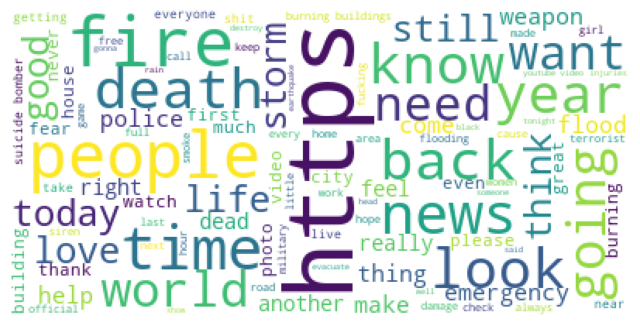

In [391]:
wordcloud(" ".join(text))


The most common words in the corpus are https, people, fire, video, news, disaster, emergency for the top 7. We observe behind them interesting words which can add interesting information about the target of the tweets. But to make a more clear wordcloud we must trace a wordcloud for each target class.

In [392]:
target = train_set_['target'].unique()

In [393]:
target

array([0, 1], dtype=int64)

In [394]:
# Create a new wordcloud function
def wordcloud_hue(data_frame: pd.DataFrame, target: str = "target", text: str = "text", figsize: tuple = (8, 8), max_font_size: int = 60, max_words: int = 100, background_color = "white"):
    
    unique_classes = data_frame[target].unique().tolist()
    
    fig, axs = plt.subplots(1, len(unique_classes), figsize = figsize)
    
    axs = axs.flat
    
    for i, class_ in enumerate(unique_classes):
        
        text_ = data_frame[data_frame[target] == class_][text].tolist()
        
        word_cloud = WordCloud(
            max_font_size=max_font_size,
            max_words=max_words,
            background_color=background_color).generate(" ".join(text_))
        
        axs[i].set_title(class_)
        
        axs[i].imshow(word_cloud)
        
        axs[i].axis('off')
        
    plt.show()
    

Let's trace the wordclouds.

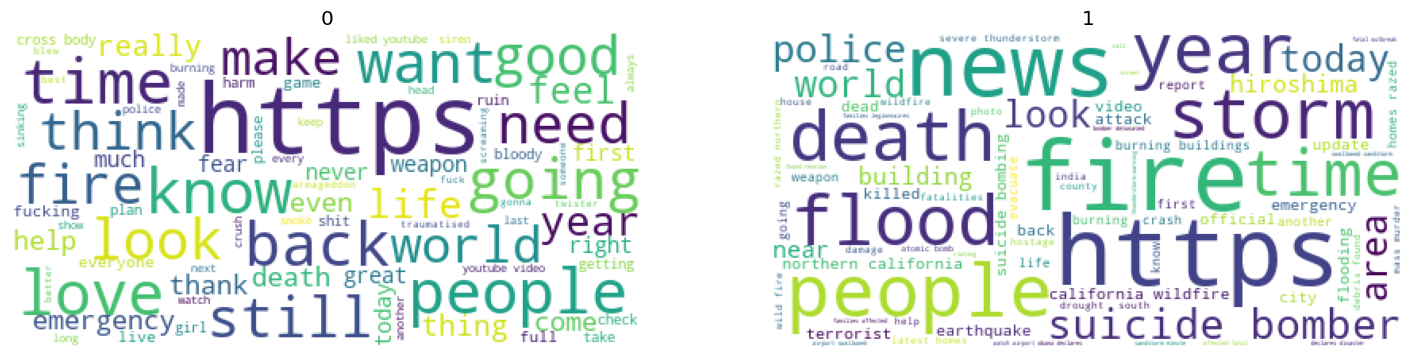

In [395]:
wordcloud_hue(train_set_, figsize=(18, 7), max_words=80)

For the top 80, some words appear only in one of the two classes like the followings:
- news, storm, police, buildings, suicide bombing, flood, suicide, year etc
- thank, love, want, girl, right, really, life, etc

Where another words appear on both of the two classes like the followings:
- fire, people, death, emergency, etc

Let's get the top 100 common words (top 100 of words appearing in both of the two classes) and eliminate them from the corpus.

In [401]:
# with the text to freqdist function we can recuperate the top common words
class_0 = train_set_[train_set_['target'] == 0]
class_1 = train_set_[train_set_['target'] == 1]

freqs_series_0, _ = get_freqs_from_text(class_0['text'])
freqs_series_1, _ = get_freqs_from_text(class_1['text'])


In [402]:
train_set_['target'].unique()

array([0, 1], dtype=int64)

In [403]:
# recuperate words appearing in both of the two Series
def words_w_same_classes(freqs_series: List[pd.Series], top: int = 10):
    """Recuperate words appearing in two different classes

    Args:
        freqs_series (List[pd.Series]): A list of words frequencies as pandas Series where words are indexes and each of them represents a target class
        top (int, optional): The number of words on the top. Defaults to 10.

    Returns:
        list: The list of words appearing in both of the two classes
    """
    
    assert len(freqs_series) > 1
    
    f_serie = freqs_series[0].sort_values(ascending=False).head(top)
    
    words = set(f_serie.index)
    commons = set()
    
    for freq_serie in freqs_series[1:]:
        
        f_serie = freq_serie.sort_values(ascending=False).head(top)

        for word in f_serie.index:
            
            if word in words:
                
                commons.add(word)
            
            else:
                
                words.add(word)
   
    return list(commons)

In [406]:
words_01 = words_w_same_classes([freqs_series_0, freqs_series_1], top = 100)

In [407]:
words_01

['emergency',
 'would',
 'news',
 'today',
 'burning',
 'https',
 'video',
 'crash',
 'first',
 'time',
 'death',
 'still',
 'back',
 'watch',
 'http',
 'people',
 'another',
 'like',
 'year',
 'home',
 'could',
 'police',
 'dead',
 'fire',
 'world',
 'disaster',
 'buildings']

Let's delete them from the data frame.

In [408]:
new_freqs_cp = new_freqs.copy()

for word in new_freqs_cp.keys():
    
    if word in words_01:
        
        del new_freqs[word] 

In [409]:
len(new_freqs)

1634

In [410]:
def clean_text(index: int, words: Union[nltk.FreqDist, list, set, tuple] = new_freqs):
    """Clean a given document by taking only words that are chosen as representative of the target

    Args:
        index (int): The index of the document
        words (Union[nltk.FreqDist, dict, list, set, tuple]): The words that we want preserve

    Returns:
        str: The new document
    """
    tokens = new_texts_[index]
    tokens = [token for token in tokens if token in words]
    return " ".join(tokens)

In [411]:
train_set_['text'] = train_set_.index.map(clean_text)

In [412]:
train_set_.drop(index=train_set_[train_set_['text'] == ""].index, inplace=True)

In [413]:
train_set_.shape[0]

7431

In [414]:
# Save the new (maybe final) version 
train_set_.to_csv('nlp_project/data/data_+/cleaned_data2.csv')

---------------------------------------

#### Stack processing steps to create a more pertinent new text column

Let's create a class which will help us to create a more pertinent text column.

In [97]:
%%writefile nlp_project/processing/pipeline.py

from nlp_project.processing.utils import *
from typing import List
from nltk.corpus import stopwords

class TextPipeProcessing:
    """The pipeline is composed by (* if obligatory processing):
    - tokenize_text*
    - create_corpus*
    - print_frequency*
    - print_frequency_out_limits
    - print_most_common_words
    - plot_frequency_histogram
    - print_n_time_frequency_words
    - delete_n_time_frequency_words
    - lemmatize_words / stem_words
    - corpus_filter 
    - get_words_w_same_targets
    - remove_words
    - remove_words_w_same_targets
    - recuperate_results*
    - add_results_to_data_frame*
    - plot_wordcloud
    """
    def __init__(self, data_frame, text_column: str, target_column: str = 'target'):
        
        self.data_frame = data_frame
        
        self.text_column = text_column
        
        self.target_column = target_column
        
        self.lemmatizer = None
        
        self.stemmer = None
    
    def tokenize_text(self,
                      language: str = 'english',
                      regex: str = r"\w+",
                      min_word_length: int = 3,
                      only_alpha: bool = True,
                      ):
        
        texts = self.data_frame[self.text_column]
        
        texts = texts.tolist()
        
        self.stopwords = set(stopwords.words(language))
        
        self.tokens = pre_transformation1(texts, self.stopwords, min_word_length, regex, only_alpha)
    
        return self.tokens
        
    def create_corpus(self):
        
        self.corpus = []
        
        for document in tqdm(self.tokens):
            
            self.corpus.extend(document)
        
        self.corpus_text = nltk.text.Text(self.corpus)
        
        print(f"Number of words: {len(self.corpus):->16}")
        print(f"Number of unique words: {len(self.corpus_text.vocab()):->16}")
        
        return self.corpus, self.corpus_text
    
    def print_frequency(self):
        
        self.frequency = pd.DataFrame.from_dict(self.corpus_text.vocab(), 'index')
        
        self.frequency.rename({0: 'frequency'}, inplace=True, axis=1)
        
        self.frequency.reset_index(level=0, inplace=True)
        
        print(self.frequency.head())
    
    def print_frequency_out_limits(self):
        
        px.box(data_frame=self.frequency, x="frequency", hover_data=['index', 'frequency']) 
        
        self.low, self.high = guess_limitations(self.frequency, 'frequency') 
        
        print(f"Low limit: {self.low:->16}")
        print(f"High limit: {self.high:->16}")
    
    def print_most_common_words(self, lower_bound: int = 400, n_words: int = 20):
        
        self.freq_total = nltk.Counter(self.corpus_text.vocab())
        
        self.stopwords_common = list(zip(*self.freq_total.most_common(lower_bound)))[0]
        
        print("Most common words are:")
        print(self.stopwords_common[:20])
    
    def plot_frequency_histogram(self, bottom: int = 8):
        
        f_values = self.frequency['frequency'].sort_values().unique()        
    
        bottom_ = self.frequency[self.frequency['frequency'].isin(f_values[:bottom])]
        
        fig = px.histogram(data_frame = bottom_, x = 'frequency', title=f"Frequency histogram for {bottom} frequency on the bottom")
        
        fig.show()
        
    def print_n_time_frequency_words(self, n_time_freq: Union[int, list] = 1, n_words: int = 100):
        
        n_time_freq = [n_time_freq] if type(n_time_freq) is int else n_time_freq
        
        size = self.frequency[self.frequency['frequency'].isin(n_time_freq)].shape[0]
        
        n_time_frequency = self.frequency[self.frequency['frequency'].isin(n_time_freq)]
        
        print(f"Percentage of words appearing {'/'.join([str(freq) for freq in n_time_freq])} times in the dataset: {size / self.frequency.shape[0]}%")
        
        print(f"Words appearing {'/'.join([str(freq) for freq in n_time_freq])} times:")
        print(n_time_frequency.iloc[:n_words,:])
    
    def delete_n_time_frequency_words(self, n_time_freq: Union[int, list] = 1):
        
        n_time_freq = [n_time_freq] if type(n_time_freq) is int else n_time_freq
        
        n_time_frequency = self.frequency[self.frequency['frequency'].isin(n_time_freq)]
        
        self.new_frequency = self.frequency.loc[~self.frequency['index'].isin(n_time_frequency['index'].to_list()), :]
        
        print("The new frequency data frame is stored in `new_frequency` variable.")
        
        print(f"The number of deleted observations: {n_time_frequency.shape[0]:->16}")
        
    def lemmatize_words(self, lemmatizer = nltk.WordNetLemmatizer()):
        
        self.lemmatizer = lemmatizer
        
        self.new_frequency = self.new_frequency.copy()
        
        self.new_frequency.loc['index'] = self.new_frequency['index'].apply(lambda idx: lemmatizer.lemmatize(idx))
        
        self.new_frequency.dropna(axis=0, inplace=True)
        
        self.new_frequency['frequency'] = self.new_frequency['frequency'].astype('int32')
    
    def stem_words(self, stemmer = nltk.stem.PorterStemmer()):
        
        self.stemmer = stemmer
        
        self.new_frequency = self.new_frequency.copy()
        
        self.new_frequency.loc["index"] = self.new_frequency["index"].apply(lambda idx: stemmer.stem(idx))
        
        self.new_frequency.dropna(axis = 0, inplace=True)
        
        self.new_frequency['frequency'] = self.new_frequency['frequency'].astype('int32')
    
    def corpus_filter(self, corpus: nltk.corpus.words.words()):
        
        if self.lemmatizer:
        
            corpus = [self.lemmatizer.lemmatize(word) for word in corpus]
        
        elif self.stemmer:
            
            corpus = [self.stemmer.stem(word) for word in corpus]
        
        self.new_frequency = self.new_frequency[self.new_frequency['index'].isin(corpus)]
    
    def remove_words(self, words_to_remove: List[str]):
        
        self.new_frequency.drop(index=self.new_frequency[self.new_frequency['index'].isin(words_to_remove)].index, inplace = True)
    
    def get_words_w_same_targets(self, top: int = 30):
        
        target = self.data_frame[self.target_column].unique().tolist()

        freqs_series = []
        
        for class_ in target:
            
            class_df = self.data_frame[self.data_frame[self.target_column] == class_]
            
            freqs_serie, _ = get_freqs_from_text(class_df[self.text_column])
            
            freqs_series.append(freqs_serie)
            
        words_s_classes = words_w_same_classes(freqs_series, top = top)

        return words_s_classes
    
    def remove_words_w_same_targets(self, top: int = 30):
        
        words_s_classes = self.get_words_w_same_targets(top)
        
        self.remove_words(words_s_classes)
    
    def recuperate_results(self):
        try:
            frequency = self.new_frequency.copy()
        except:
            frequency = self.frequency.copy()
        finally:
            print("The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!")
        
        frequency.set_index('index', inplace = True)
        
        frequency = frequency.to_dict()
        
        frequency = frequency['frequency']
        
        self.results = nltk.FreqDist(frequency)
        
        return self.results
    
    def add_results_to_data_frame(self, new_text_column_name: Union[str, None] = None):
        
        if not new_text_column_name: new_text_column_name = self.text_column
        
        def clean_text(index: int, words: Union[nltk.FreqDist, list, set, tuple] = self.results):
            """Clean a given document by taking only words that are chosen as representative of the target

            Args:
                index (int): The index of the document
                words (Union[nltk.FreqDist, dict, list, set, tuple]): The words that we want preserve

            Returns:
                str: The new document
            """
            tokens = self.tokens[index]
            tokens = [token for token in tokens if token in words]
            return " ".join(tokens)
        
        self.data_frame.index = list(range(self.data_frame.shape[0]))
        
        self.data_frame[new_text_column_name] = self.data_frame.index.map(clean_text)
        
        self.text_column = new_text_column_name
        
        # self.data_frame.drop(index=self.data_frame[self.data_frame['text'] == ""].index, inplace=True)
        
        # print(self.data_frame.sample(30))
        
    def plot_wordcloud(self, by_target: bool = True, figsize: tuple = (8, 8), max_font_size: int = 60, max_words: int = 100, background_color = "white"):
        try:
            
            if not by_target:
               
                text = self.data_frame[self.text_column].tolist()
               
                wordcloud(" ".join(text), figsize=figsize, max_font_size=max_font_size, max_words=max_words)
            
            else:
                
                wordcloud_hue(self.data_frame, target=self.target_column, text = self.text_column, figsize=figsize, max_font_size=max_font_size, max_words=max_words)
                
        except:
            raise AttributeError("Don't forget to add result `add_results_to_data_frame` method before plotting the wordcloud(s)!")
    
            
            
      

Overwriting nlp_project/processing/pipeline.py


Let's apply the pipelined text processing class to the data frame.

In [98]:
from nlp_project.processing.pipeline import TextPipeProcessing

In [99]:
process_text = TextPipeProcessing(train_set_, 'text')

The pipeline is composed by (* if obligatory processing):
- tokenize_text*
- create_corpus*
- print_frequency*
- print_frequency_out_limits
- print_most_common_words
- plot_frequency_histogram
- print_n_time_frequency_words
- delete_n_time_frequency_words
- lemmatize_words / stem_words
- corpus_filter 
- recuperate_results* (1)
- add_results_to_data_frame* (2)
- plot_wordcloud (3)
- get_words_w_same_targets
- remove_words
- remove_words_w_same_targets
- redo (1), (2) and (3)

In [100]:
tokens = process_text.tokenize_text()

100%|██████████| 7521/7521 [00:00<00:00, 102291.80it/s]


In [101]:
tokens[:30]

[['crushed'],
 [],
 [],
 ['fatality'],
 [],
 ['meltdown'],
 ['looooool'],
 ['fatality'],
 ['cooool'],
 ['thunder'],
 ['fire'],
 ['screams'],
 ['lava'],
 ['obliterated'],
 ['love', 'skiing'],
 ['survive'],
 ['noel', 'back'],
 ['poor', 'jack'],
 ['wreck'],
 ['fatality'],
 ['eggs', 'desolate'],
 ['love', 'fruits'],
 ['sirens'],
 [],
 ['earthquake'],
 ['blood'],
 ['storm'],
 ['finally', 'storm'],
 ['damn', 'bloody'],
 ['smoke', 'sleep']]

In [102]:
corpus = process_text.create_corpus()

100%|██████████| 7521/7521 [00:00<00:00, 2481737.11it/s]

Number of words: -----------63459
Number of unique words: -----------14864


In [103]:
process_text.print_frequency()

      index  frequency
0   crushed         31
1  fatality         32
2  meltdown         34
3  looooool          1
4    cooool          1


In [104]:
process_text.print_frequency_out_limits()

Low limit: -------------0.5
High limit: -------------3.5


In [105]:
process_text.print_most_common_words()

Most common words are:
('http', 'https', 'like', 'fire', 'people', 'news', 'video', 'emergency', 'disaster', 'police', 'would', 'body', 'still', 'storm', 'back', 'california', 'crash', 'burning', 'time', 'suicide')


In [106]:
process_text.plot_frequency_histogram()

In [107]:
process_text.print_n_time_frequency_words(list(range(1, 7)), 40)

Percentage of words appearing 1/2/3/4/5/6 times in the dataset: 0.8882534983853606%
Words appearing 1/2/3/4/5/6 times:
          index  frequency
3      looooool          1
4        cooool          1
11       skiing          1
13         noel          1
18         eggs          3
20       fruits          2
30        legit          4
34   attraction          2
44     emotions          5
46      surgery          2
52      anxiety          3
55         reap          4
65   girlfriend          6
66        pasta          2
67     puncture          2
72      baskgod          1
77   kynespeace          1
80       hating          3
85    catalogue          1
87      popcorn          1
90     scalpium          1
92        edwin          1
97    motivator          1
99   stacedemon          1
105        ight          1
106   wonderful          5
107     memphis          3
110       bless          4
114       lmfao          5
115        dick          4
117        hype          3
119     shayoly  

In [108]:
process_text.delete_n_time_frequency_words(list(range(1, 7)))

The new frequency data frame is stored in `new_frequency` variable.
The number of deleted observations: -----------13203


In [109]:
stemmer = nltk.PorterStemmer()

In [110]:
process_text.stem_words(stemmer)

In [111]:
process_text.corpus_filter(english_words)

In [112]:
process_text.recuperate_results()

The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!


FreqDist({'like': 347, 'fire': 249, 'news': 196, 'video': 162, 'would': 136, 'still': 128, 'storm': 121, 'back': 120, 'california': 120, 'crash': 119, ...})

In [113]:
process_text.add_results_to_data_frame()

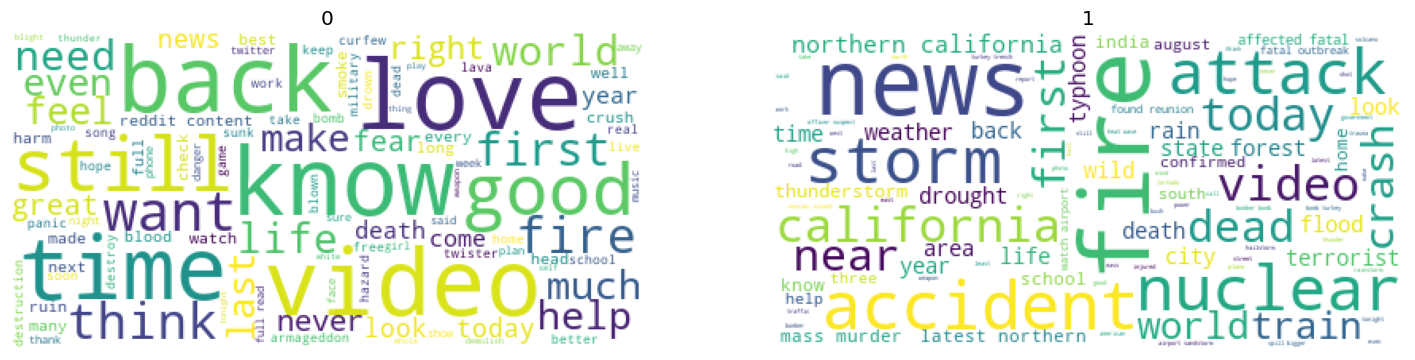

In [114]:
process_text.plot_wordcloud(figsize=(18, 7))

In [115]:
words_s_targs = process_text.get_words_w_same_targets(100)

In [116]:
words_s_targs

['',
 'know',
 'like',
 'first',
 'watch',
 'many',
 'back',
 'look',
 'year',
 'last',
 'death',
 'world',
 'bomb',
 'today',
 'would',
 'home',
 'make',
 'right',
 'school',
 'nuclear',
 'dead',
 'still',
 'could',
 'live',
 'video',
 'crash',
 'storm',
 'fire',
 'help',
 'attack',
 'life',
 'time',
 'news']

In [117]:
process_text.remove_words_w_same_targets(100)

In [118]:
process_text.recuperate_results()

The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!


FreqDist({'california': 120, 'love': 101, 'full': 93, 'good': 89, 'accident': 88, 'think': 85, 'train': 85, 'want': 79, 'best': 75, 'work': 74, ...})

In [119]:
process_text.add_results_to_data_frame()

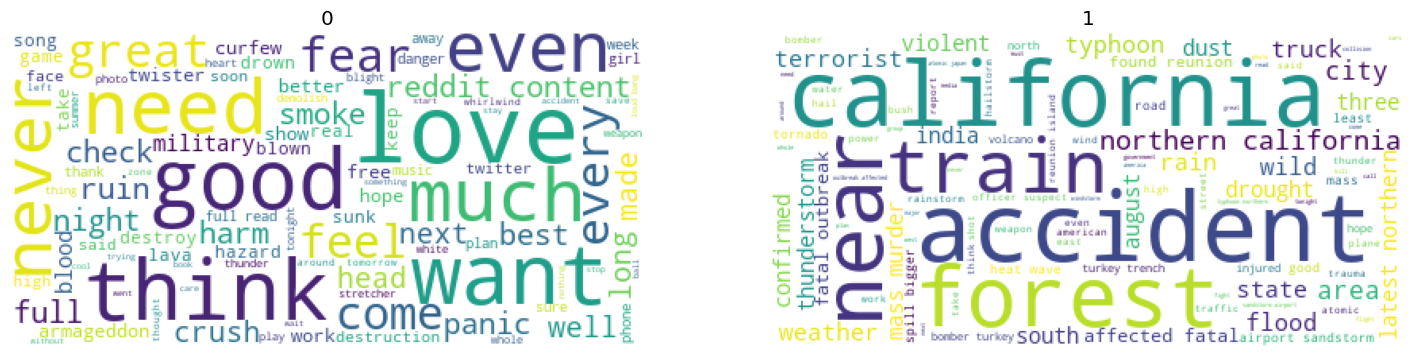

In [120]:
process_text.plot_wordcloud(figsize = (18, 7))

Let's count the occurrence of each target class.

In [121]:
train_set_['target'].value_counts()

0    4315
1    3206
Name: target, dtype: int64

The occurrence of class 0 (no disaster) is more important than that of class 1 (disaster).

Some text can contains only commas since we delete many words in the corpus. So let's recount the length of the texts.

In [122]:
train_set_['new_tweet_len'] = train_set_['text'].map(lambda text: len(text))

In [123]:
train_set_['new_tweet_len'].min()

0

In [124]:
(train_set_['new_tweet_len'] == 0).sum()

998

Let's suppress the new text lines containing commas.

In [125]:
new_train_set = train_set_[train_set_['new_tweet_len'] != 0]

In [126]:
new_train_set.head()

text  target  new_tweet_len
9     thunder       0              7
12       lava       0              4
14       love       0              4
17  poor jack       0              9
18      wreck       0              5

#### Improve the processing with some other methods

We decided to improve the processing because we remark some problems in the previous steps. 

- The nltk lemmatization is not relevant because it cannot get the basic form of some words like we saw in the previous sections and the stemming also cannot transform words to interesting forms since it remove only the prefixes and the suffixes. We must use a more relevant method to lem the documents.

- We cannot use directly the lower method because some words can be more interesting in upper case. 

- The vocabulary can contains some words representing the person names. Those words don't add important information.  

- The most important part of those new processing must be done before the tokenization and through it. 

We will talk about some other problems and find their solutions later. We will use more sophisticated libraries like `spacy`, which use an interesting API to make us doing more complicated staffs, and `unicode`, an interesting library for removing some special unicode characters. Let's import them and for spacy we will load the english dictionary since we work with english tweets.  

In [133]:
import spacy

# add the english model based on the web corpus
nlp = spacy.load("en_core_web_md")

Let's print the component names of the nlp object

In [134]:
nlp.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'attribute_ruler',
 'lemmatizer',
 'ner']

and the maximum length 

In [135]:
nlp.max_length

1000000

The nlp object is a pre trained model. It is compiled with the `web` corpus to make us doing interesting nlp tasks.

It can generate a maximal character number of 1 000 000 characters. We can change that value depending in our need.

We will change the pre_transformation function in order to use the spacy library in place of the nltk library. 

We will make the following simple processing through the tokenization :

- We must add some tokenization rules (exceptions) before tokenizing the the documents; 
    - Delete the mentions
    - Separate in multiple parts a word in camel case  
- Delete the punctuations;
- Delete the too much space in our documents;
- Delete URLs;
- Remove tokens present in the english stop words;
- Delete the emojis by recuperating token with more that 1 character;
- Delete tokens having PER (person) as entity type;
- Decide if it is necessary to add only the verbs or/and the adjectives, etc. ??
- Keep words in upper case because they define an impacting speech (for disaster events in example).

-------------------------------

Let's define some rules before the tokenization:

1. Mentions

Some tweets contains mentions like @Oumar199. Those mentions can be deleted by adding a new rule with the help of the regular expressions. 

A mention contains in left side an '@' and the other elements can letters or digits or _ (underscores). Let's define the regex expression bellow. 

In [142]:
ment_regexp = r"@[\w\d_]+"

We can use the Token class in spacy and `re` for regular expression to add the a new extension named as handle or like_handle.

In [143]:
import re
Token = spacy.tokens.Token

# A lambda function verifying if the text of a given token match the regular expression
like_handle = lambda token: re.fullmatch(ment_regexp, token.text)

Token.set_extension("like_handle", getter = like_handle)


2. Camel Cased tokens 

Some tokens can be written in camel case. They can be separated into multiple different tokens in place one token. In example the word 'IAmHere' can be separated into the tokens 'I', 'Am', 'Here'. To do that we must define a new rule which make the camel cased words, excepted the mentions (which are also camel cased words), tokenized into multiple words.   

For the regular expression we one or multiple stacked words with each of them beginning with a capitalized letter. We can represent them like this:

In [144]:
camel_re = "[A-Z][a-z0-9]+"

In [145]:
# Add the mention regular expression as an exception
nlp.tokenizer.token_match = re.compile(ment_regexp).match

# Recuperate a list of the infixes
default_infixes = list(nlp.Defaults.infixes)

# Add the new regular expression in the list of infixes
default_infixes.append(camel_re)

# Add the new infixes' list in the list of the spacy's tokenization defined on the infixes
infix_regex = spacy.util.compile_infix_regex(default_infixes)

nlp.tokenizer.infix_finditer = infix_regex.finditer


3. Remove some predefined exceptions

Some exceptions for the tokenization are defined in the spacy library. Let's check them to verify if they interesting for our purpose.

In [147]:
# nlp.Defaults.tokenizer_exceptions

------------------------